# Gitcoin Dynamical Network generation

03dec2020

---



## Dependences & parameters

In [1]:
%load_ext autotime

In [2]:
from src.model import *
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px

time: 7.37 s


## Execute simulation

In [3]:

from cadCAD import configs

result = run(configs)



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 4, 1, 7)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.54s
time: 575 ms


## Data analysis

In [4]:
df = result.loc[(0, 0, 1, slice(None))]


time: 12.2 ms


In [5]:
fig = px.line(df.reset_index(),
              x='timestep',
              y=['quadratic_total_match', 'quadratic_total_funding'])

fig.show()

time: 1.07 s


In [6]:
y = df.quadratic_total_funding / df.quadratic_total_match
y.name = 'funding_per_match'
px.line(y.reset_index(),
        x='timestep',
        y='funding_per_match',
        log_y=True)

time: 232 ms


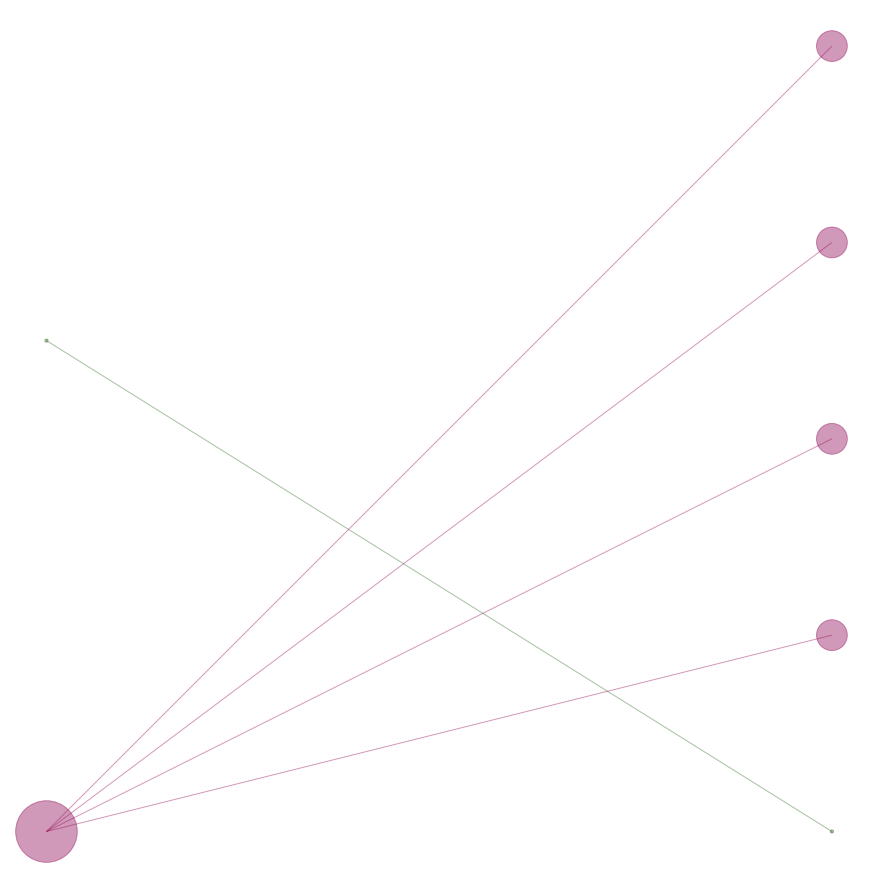

time: 520 ms


In [7]:
from src.utils import plot_contributions
c = df.contributions.iloc[5]
plot_contributions(c)


In [9]:
from src.utils import create_video_snap

create_video_snap(df.contributions)


TypeError: create_video_snap() missing 2 required positional arguments: 'size_scale' and 'dims'